In [1]:
%matplotlib inline
from __future__ import division
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import seaborn as sns
import numpy.random as rnd
import numpy as np
import scipy.stats as st
from astropy.stats import freedman_bin_width
sns.set_context("talk")

/usr/lib/python2.7/site-packages/matplotlib/__init__.py:872: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


In [2]:
num_samples = 20
num_trials = 5000

# pick uniform distribution so that it has standard deviation of 1
length = np.sqrt(12 * num_samples)
uniform = st.uniform(-length/2, length)

random_nums = uniform.rvs(num_samples * num_trials)
trials = np.array_split(random_nums, num_trials)
means = np.array([sample.mean() for sample in trials])

In [3]:
# pick bins, and find bin centers
bin_width, bin_edges = freedman_bin_width(means, return_bins=True)
counts, bin_edges = np.histogram(means, bins=bin_edges)
bin_centers = 0.5 * (bin_edges[1:] + bin_edges[:-1])

count_prob = counts / (num_trials * bin_width)

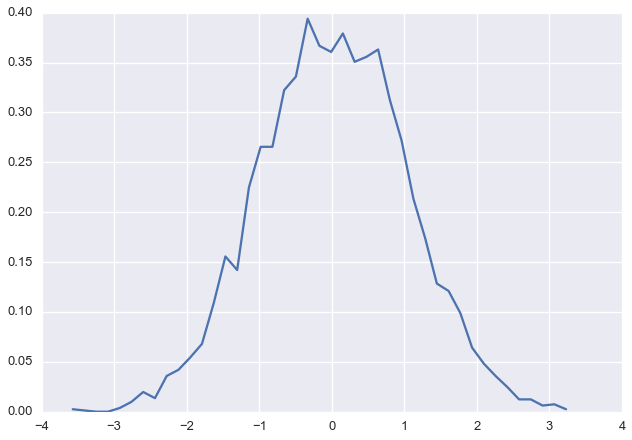

In [4]:
gauss_fig, gauss_ax = plt.subplots()
plt.plot(bin_centers, count_prob);

In [5]:
gauss = st.norm().pdf(bin_centers)
        
diff = count_prob - gauss
rel_diff = count_prob/gauss

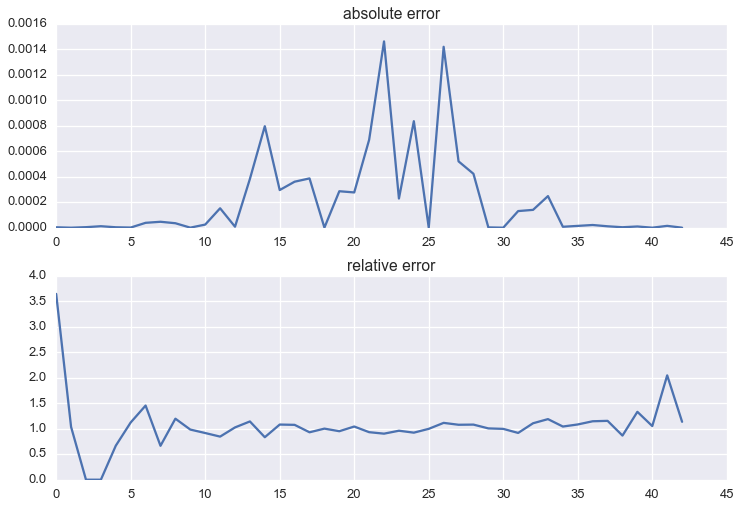

In [6]:
error_fig = plt.figure()

grid = gridspec.GridSpec(nrows=2, ncols=1)

abs_ax = plt.subplot(grid[0])
abs_ax.plot(diff**2);
abs_ax.set_title("absolute error")

rel_ax = plt.subplot(grid[1])
rel_ax.plot(rel_diff)
rel_ax.set_title("relative error");

grid.tight_layout(error_fig)